<a href="https://colab.research.google.com/github/GauravGurv/ML_Projects/blob/main/Students_Exam_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-----**Important Library** Need to Install before run this (Please Ignore if already install)--------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 303)

#-----------------------importing data via internal and wxternal link----------------------------

In [6]:
# df = pd.read_csv('D:\Data Science\DS_Project\Students Exam Scores\Expanded_data_with_more_features.csv')
# df = pd.read_csv('D:\Data Science\DS_Project\Students Exam Scores\Original_data_with_more_rows.csv')
df = pd.read_csv(r'https://raw.githubusercontent.com/GauravGurv/Practice_Dataset/main/Expanded_data_with_more_features.csv?token=GHSAT0AAAAAACB5ZS7K4KXWEQMAUC7BHDDYZCR7HZQ')
# df = pd.read_csv(r'https://raw.githubusercontent.com/GauravGurv/Practice_Dataset/main/Original_data_with_more_rows.csv?token=GHSAT0AAAAAACB5ZS7LX3Z6WPJGPGP5GNWUZCR7JAQ')
df.head(7)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89


---------------Display 1st 5 rows in a table--------------

In [8]:
df['TotalScore']=(df['MathScore']+df['ReadingScore']+df['WritingScore'])
df['Percentage']=(df['MathScore']+df['ReadingScore']+df['WritingScore'])/3
print(df.head(5))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

#---------------Display total number of rows and columns------------------

In [9]:
print(df.shape)

(30641, 17)


#---------------Display total columns in a Header------------------

In [10]:
print(df.columns)

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore', 'TotalScore', 'Percentage'],
      dtype='object')


#---------------Copying the data ------------------

In [12]:
df = df[['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType','TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore','ReadingScore', 'WritingScore','TotalScore','Percentage']].copy()
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore,Percentage
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,72.000000
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,90.333333
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143,47.666667
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,185,61.666667
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,162,54.000000
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,198,66.000000
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,265,88.333333


#---------------Display Description of datasetr------------------

In [13]:
print(df.describe())

         Unnamed: 0    NrSiblings     MathScore  ReadingScore  WritingScore  \
count  30641.000000  29069.000000  30641.000000  30641.000000  30641.000000   
mean     499.556607      2.145894     66.558402     69.377533     68.418622   
std      288.747894      1.458242     15.361616     14.758952     15.443525   
min        0.000000      0.000000      0.000000     10.000000      4.000000   
25%      249.000000      1.000000     56.000000     59.000000     58.000000   
50%      500.000000      2.000000     67.000000     70.000000     69.000000   
75%      750.000000      3.000000     78.000000     80.000000     79.000000   
max      999.000000      7.000000    100.000000    100.000000    100.000000   

         TotalScore    Percentage  
count  30641.000000  30641.000000  
mean     204.354558     68.118186  
std       43.362980     14.454327  
min       27.000000      9.000000  
25%      175.000000     58.333333  
50%      205.000000     68.333333  
75%      236.000000     78.666667  


# ---------------Display Datatype of datasetr------------------

In [14]:
print(df.dtypes)

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
TotalScore               int64
Percentage             float64
dtype: object


# ---------------Renaming our columns------------------

In [30]:
df1 = df.rename(columns={'Unnamed: 0':'ID','Gender':'GENDER', 'EthnicGroup':'ETHNIC-GROUP', 'ParentEduc':'PARENT-EDUCATION', 'LunchType':'LUNCH-TYPE','TestPrep':'TEST-PREPERATION',
                        'ParentMaritalStatus':'PARENTS-MARITAL-STATUS', 'PracticeSport':'PRACTICE-SPORTS', 'IsFirstChild':'IS-FIRST-CHILD','NrSiblings':'NR-SIBLING',
                        'TransportMeans':'TRANSPORT-MEANS', 'WklyStudyHours':'WEEKLY-STUDY-HOURS', 'MathScore':'MATH-SCORE','ReadingScore':'READING-SCORE',
                        'WritingScore':'WRITTING-SCORE','TotalScore':'TOTAL-SCORE','Percentage':'PERCENTAGE'})
df1.head(5)

,ID,GENDER,ETHNIC-GROUP,PARENT-EDUCATION,LUNCH-TYPE,TEST-PREPERATION,PARENTS-MARITAL-STATUS,PRACTICE-SPORTS,IS-FIRST-CHILD,NR-SIBLING,TRANSPORT-MEANS,WEEKLY-STUDY-HOURS,MATH-SCORE,READING-SCORE,WRITTING-SCORE,TOTAL-SCORE,PERCENTAGE
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,72.000000
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,90.333333
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143,47.666667
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,76.333333


# ---------------Exams score by gender:------------------
#----------bar Plot---------------

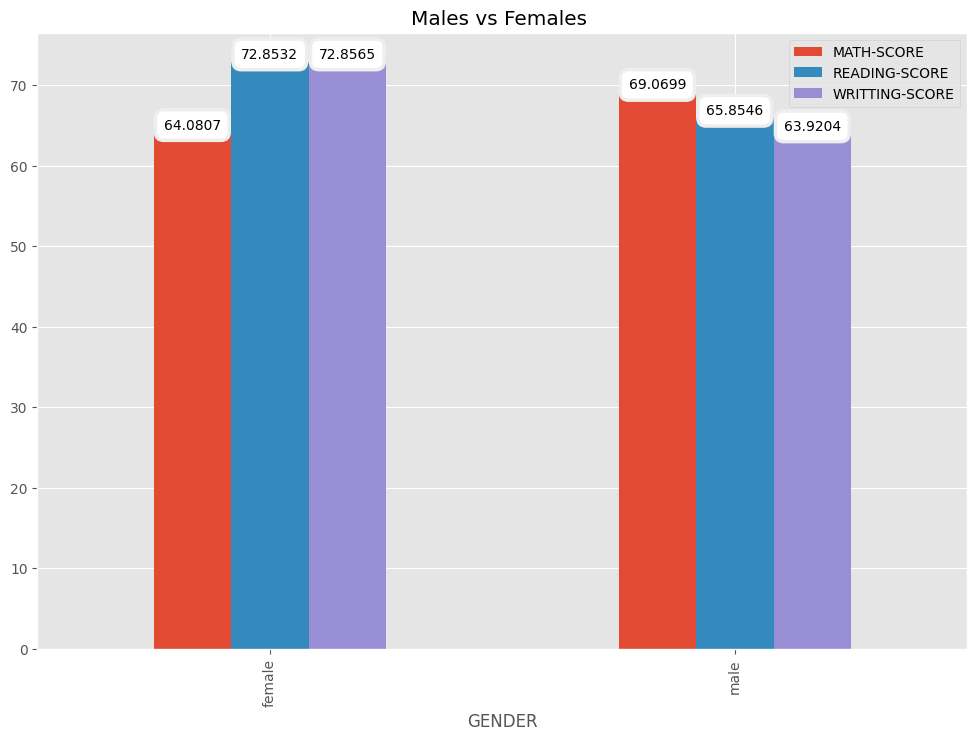

In [55]:
pv=pd.pivot_table(df1,index='GENDER',values=['MATH-SCORE','READING-SCORE','WRITTING-SCORE'])
pv

plt.style.use('ggplot')
p1=pv.plot(kind='bar',y=['MATH-SCORE','READING-SCORE','WRITTING-SCORE'],linewidth=2,figsize=(12,8),title='Males vs Females ')
p1.bar_label(p1.containers[0], padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "linewidth" : 2.5, "alpha": 1})
p1.bar_label(p1.containers[1], padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "linewidth" : 2.5, "alpha": 1})
p1.bar_label(p1.containers[2], padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "linewidth" : 2.5, "alpha": 1})
plt.show()


In [19]:
print(df1.isna().sum())

ID                           0
GENDER                       0
ETHNIC-GROUP              1840
PARENT-EDUCATION          1845
LUNCH-TYPE                   0
TEST-PREPERATION          1830
PARENTS-MARITAL-STATUS    1190
PRACTICE-SPORTS            631
IS-FIRST-CHILD             904
NR-SIBLING                1572
TRANSPORT-MEANS           3134
WEEKLY-STUDY-HOURS         955
MATH-SCORE                   0
READING-SCORE                0
WRITTING-SCORE               0
TOTAL-SCORE                  0
PERCENTAGE                   0
dtype: int64


# ---------------checking how many times unique value occured, from most occuring to least------------------

In [21]:
print(df1['IS-FIRST-CHILD'].value_counts())

yes    19082
no     10655
Name: IS-FIRST-CHILD, dtype: int64


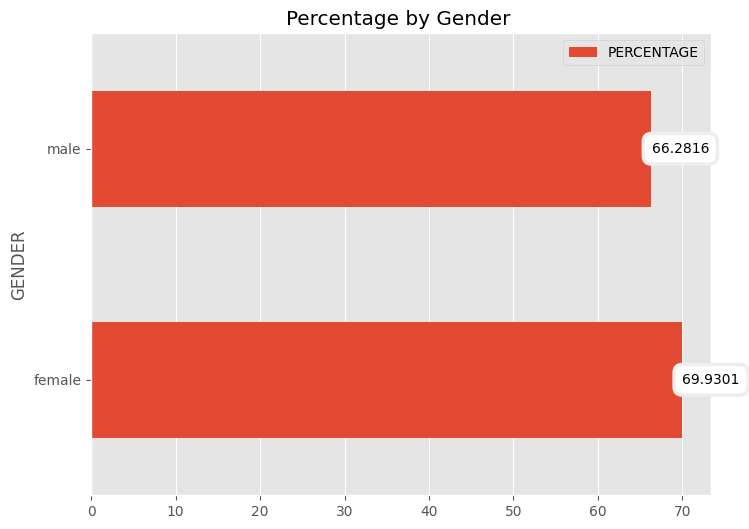

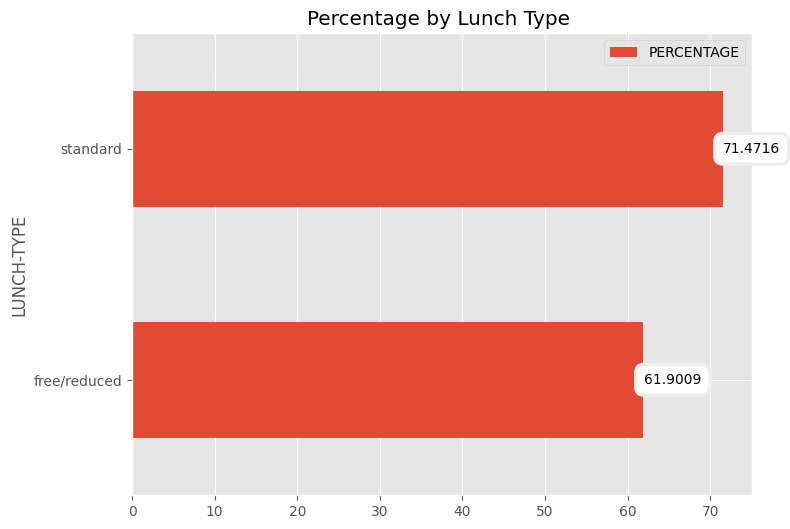

In [41]:
#----------Gender by Percentage---------------
pv=pd.pivot_table(df1,index='GENDER',values=['PERCENTAGE'])
p3=pv.plot(kind='barh',y=['PERCENTAGE'],linewidth=2,figsize=(8,6),title='Percentage by Gender ')
p3.bar_label(p3.containers[0], padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "linewidth" : 2.5, "alpha": 1})
plt.show()

#----------Bar Chart---Lunch by Percentage ---------------
pv=pd.pivot_table(df1,index='LUNCH-TYPE',values=['PERCENTAGE'])
pv=pv.sort_values(by=['PERCENTAGE'],ascending=True)
p6=pv.plot(kind='barh',y=['PERCENTAGE'],linewidth=2,figsize=(8,6),title='Percentage by Lunch Type ')
p6.bar_label(p6.containers[0], padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "linewidth" : 2.5, "alpha": 1})
plt.show()

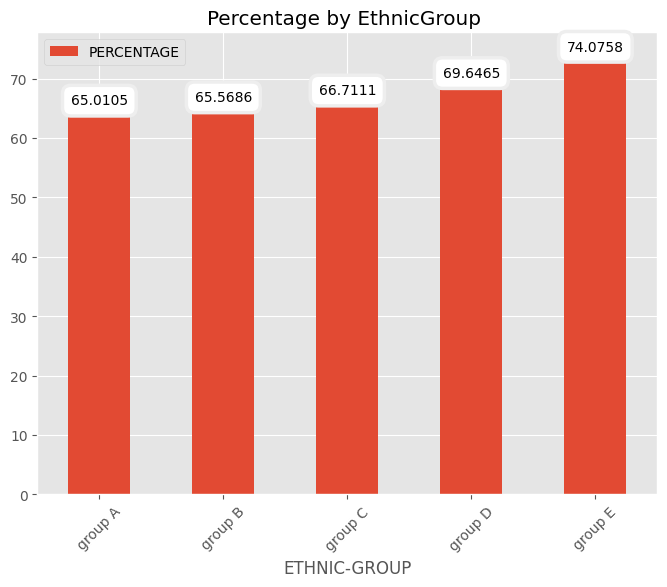

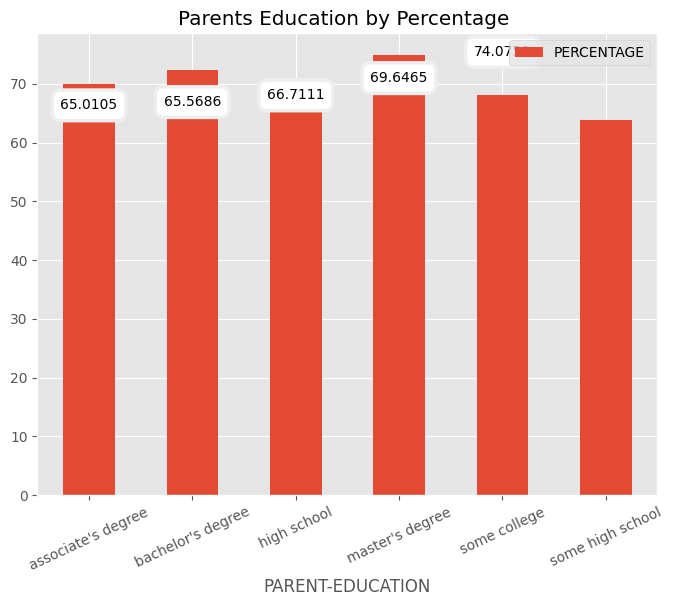

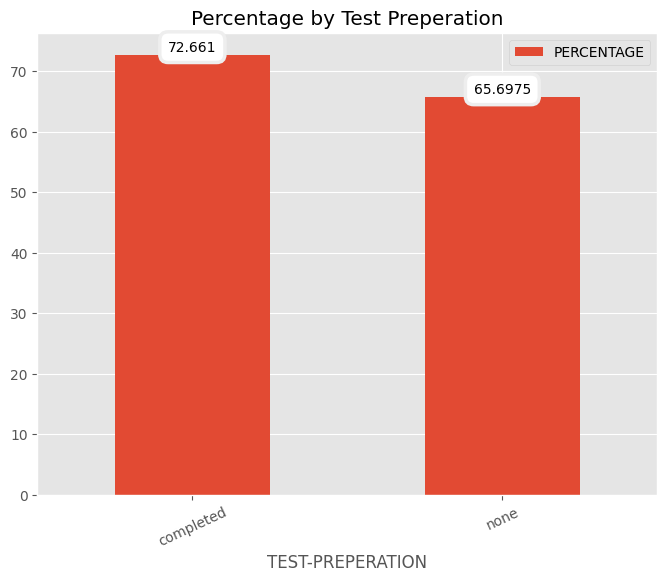

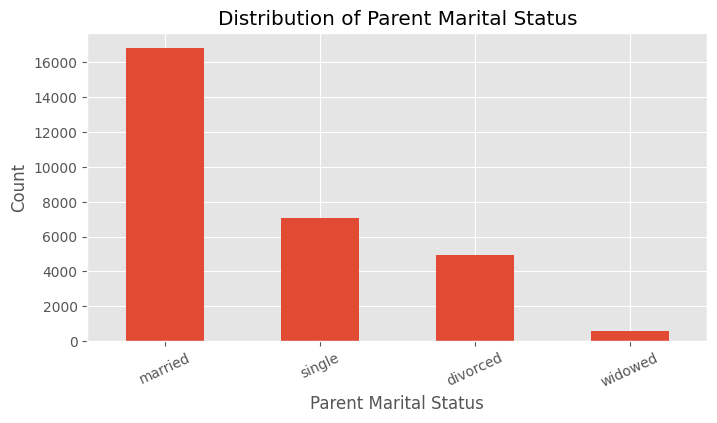

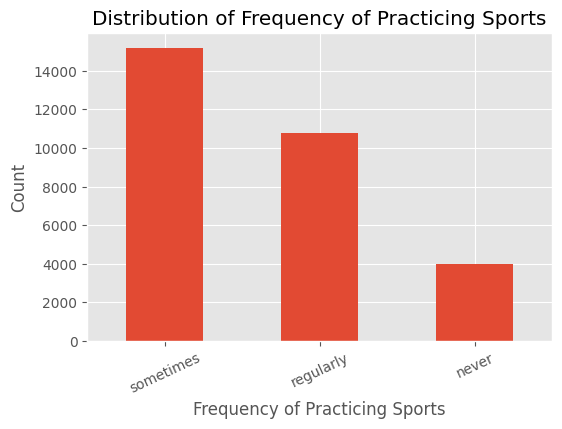

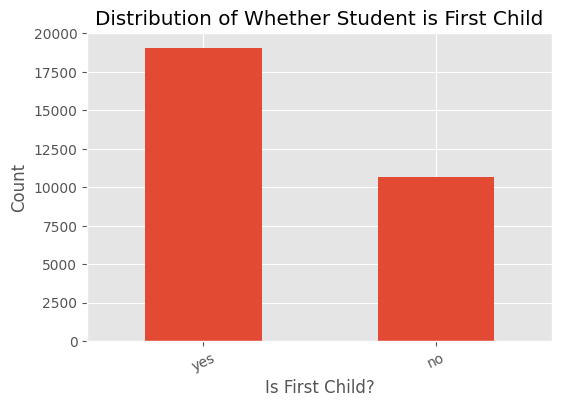

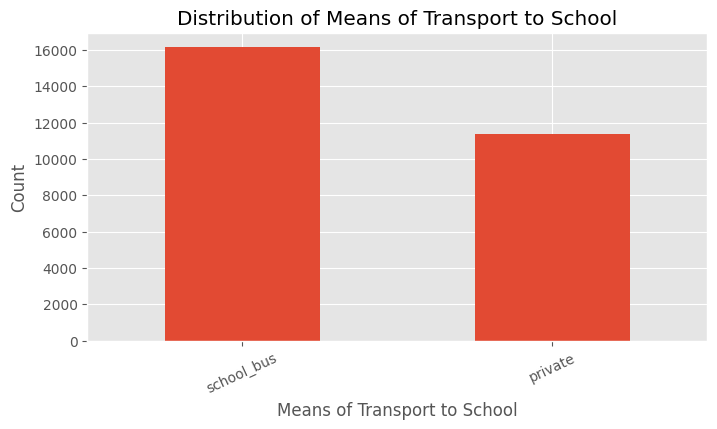

In [48]:
#----------Percentage by EthnicGroup---------------
pv=pd.pivot_table(df1,index='ETHNIC-GROUP',values=['PERCENTAGE'])
p2=pv.plot(kind='bar',y=['PERCENTAGE'],linewidth=2,figsize=(8,6),title='Percentage by EthnicGroup ')
p2.bar_label(p2.containers[0], padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "linewidth" : 2.5, "alpha": 1})
plt.xticks(rotation=45)
plt.show()

#----------Bar Chart----Parents Education by Percentage ---------------
pv=pd.pivot_table(df1,index='PARENT-EDUCATION',values=['PERCENTAGE'])
p4=pv.plot(kind='bar',y=['PERCENTAGE'],linewidth=2,figsize=(8,6),title='Parents Education by Percentage ')
p4.bar_label(p2.containers[0], padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "linewidth" : 2.5, "alpha": 1})
plt.xticks(rotation=25)
plt.show()

#----------Percentage by Test Preperation---------------
pv=pd.pivot_table(df1,index='TEST-PREPERATION',values=['PERCENTAGE'])
p7=pv.plot(kind='bar',y=['PERCENTAGE'],linewidth=4,figsize=(8,6),title='Percentage by Test Preperation')
p7.bar_label(p7.containers[0], padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "linewidth" : 2.5, "alpha": 1})
plt.xticks(rotation=25)
plt.show()

#----------Bar chart of ParentMaritalStatus column---------------
plt.figure(figsize=(8,4))
df['ParentMaritalStatus'].value_counts().plot(kind='bar')
plt.xlabel('Parent Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Parent Marital Status')
plt.xticks(rotation=25)
plt.show()

#----------Bar chart of PracticeSport column---------------
plt.figure(figsize=(6,4))
df['PracticeSport'].value_counts().plot(kind='bar')
plt.xlabel('Frequency of Practicing Sports')
plt.ylabel('Count')
plt.title('Distribution of Frequency of Practicing Sports')
plt.xticks(rotation=25)
plt.show()

#----------Bar chart of IsFirstChild column---------------
plt.figure(figsize=(6,4))
df['IsFirstChild'].value_counts().plot(kind='bar')
plt.xlabel('Is First Child?')
plt.ylabel('Count')
plt.title('Distribution of Whether Student is First Child')
plt.xticks(rotation=25)
plt.show()

#---------------Bar chart of TransportMeans column------------------
plt.figure(figsize=(8,4))
df['TransportMeans'].value_counts().plot(kind='bar')
plt.xlabel('Means of Transport to School')
plt.ylabel('Count')
plt.title('Distribution of Means of Transport to School')
plt.xticks(rotation=25)
plt.show()

#----------Line Chart---Parents Education by Percentage ---------------

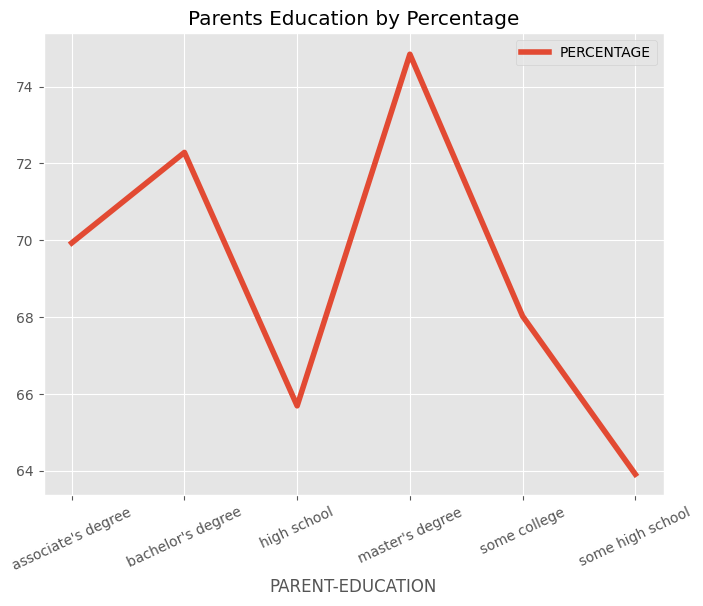

In [38]:
p5=pv.plot(kind='line',y=['PERCENTAGE'],linewidth=4,figsize=(8,6),title='Parents Education by Percentage')
plt.xticks(rotation=25)
plt.show()

#----------Histogram Chart by Percentage distribution ---------------

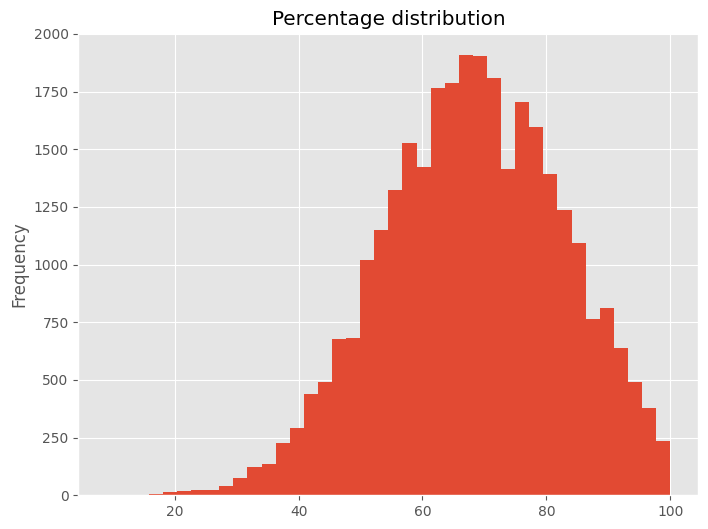

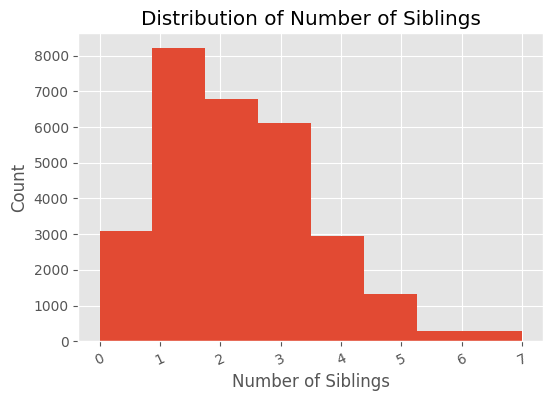

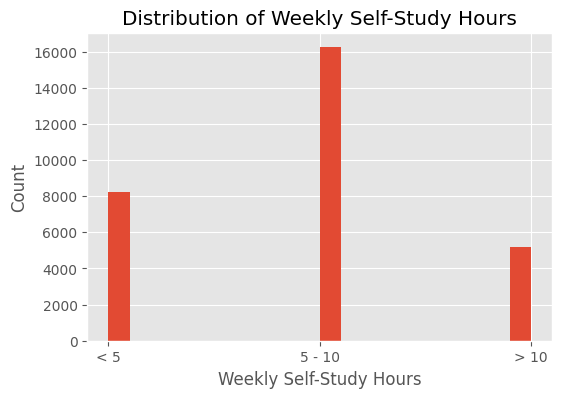

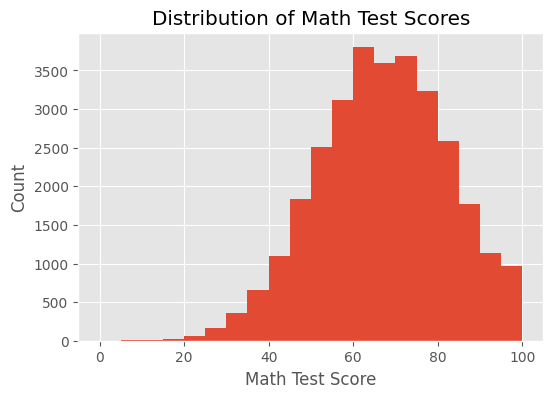

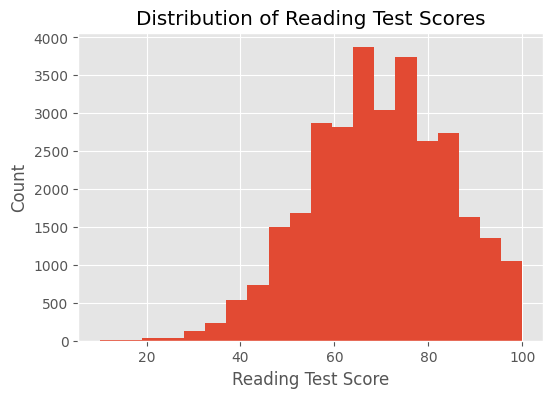

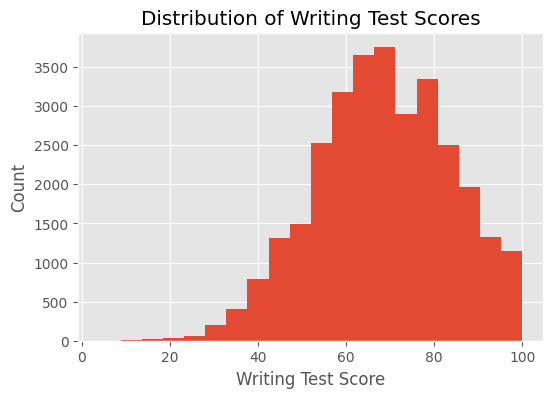

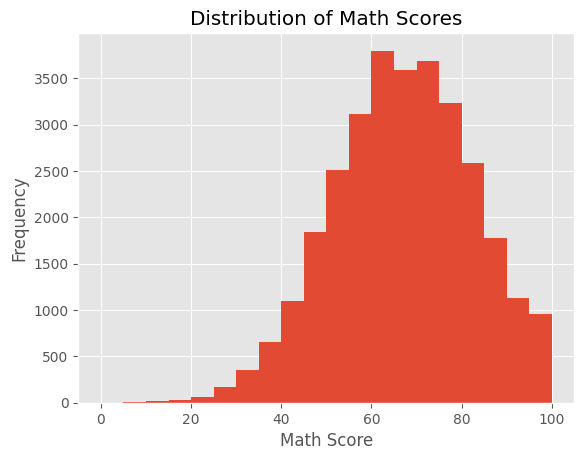

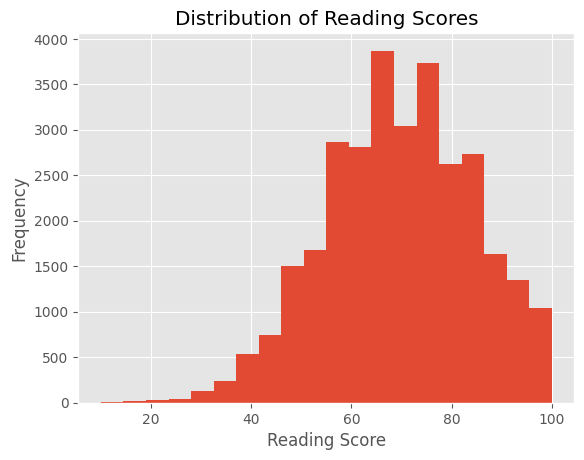

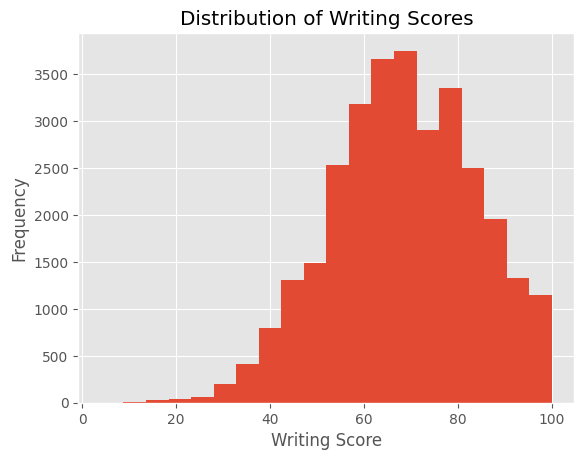

In [52]:
df1['PERCENTAGE'].plot(kind='hist',bins=40,figsize=(8,6),title='Percentage distribution')
plt.show()

#---------------Histogram of NrSiblings column------------------
plt.figure(figsize=(6,4))
df['NrSiblings'].hist(bins=8)
plt.xlabel('Number of Siblings')
plt.ylabel('Count')
plt.title('Distribution of Number of Siblings')
plt.xticks(rotation=25)
plt.show()

#---------------Histogram of WklyStudyHours column------------------
plt.figure(figsize=(6,4))
df['WklyStudyHours'].hist(bins=20)
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Count')
plt.title('Distribution of Weekly Self-Study Hours')
plt.show()

#---------------Histogram of MathScore columnn------------------
plt.figure(figsize=(6,4))
df['MathScore'].hist(bins=20)
plt.xlabel('Math Test Score')
plt.ylabel('Count')
plt.title('Distribution of Math Test Scores')
plt.show()

#---------------Histogram of ReadingScore column------------------
plt.figure(figsize=(6,4))
df['ReadingScore'].hist(bins=20)
plt.xlabel('Reading Test Score')
plt.ylabel('Count')
plt.title('Distribution of Reading Test Scores')
plt.show()

#---------------Histogram of WritingScore column------------------
plt.figure(figsize=(6,4))
df['WritingScore'].hist(bins=20)
plt.xlabel('Writing Test Score')
plt.ylabel('Count')
plt.title('Distribution of Writing Test Scores')
plt.show()


#-----------------------------------Histogram Plot: - ---------------------------------------
plt.hist(df['MathScore'], bins=20)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['ReadingScore'], bins=20)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['WritingScore'], bins=20)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()



---------------Scatter Plot: - ------------------

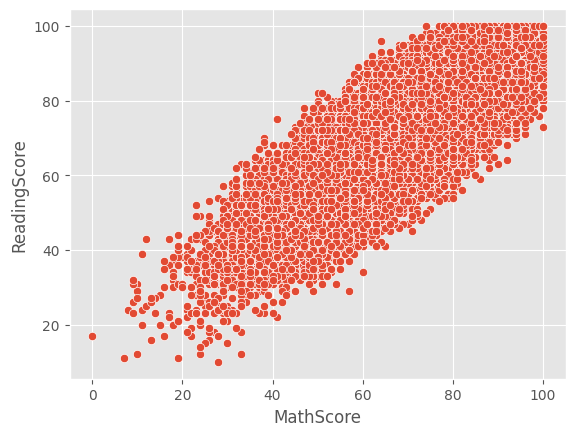

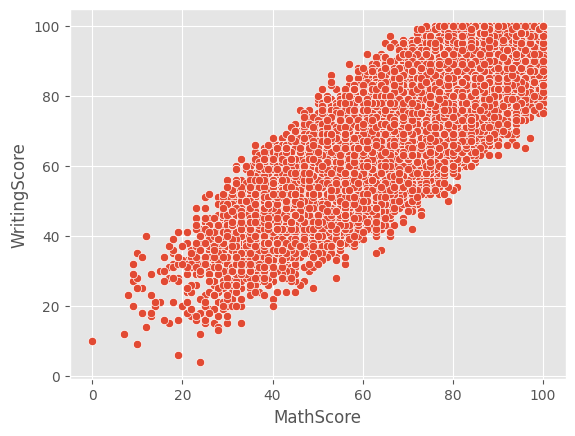

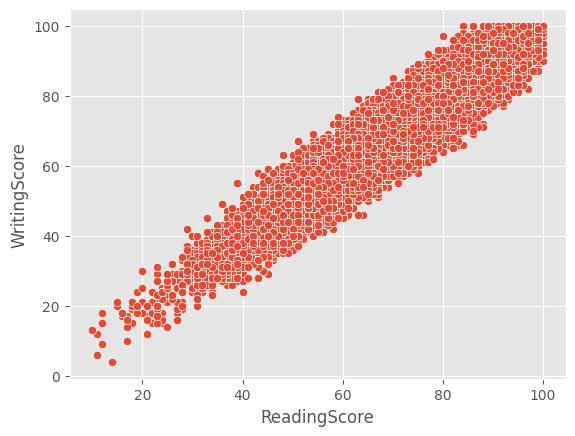

In [50]:

#plot the relationship between math score and reading score
sns.scatterplot(x='MathScore', y='ReadingScore', data=df)
plt.show()
# plot the relationship between math score and writing score
sns.scatterplot(x='MathScore', y='WritingScore', data=df)
plt.show()
# plot the relationship between reading score and writing score
sns.scatterplot(x='ReadingScore', y='WritingScore', data=df)
plt.show()



#-------------------------------------BoxPlot------------------------------------------

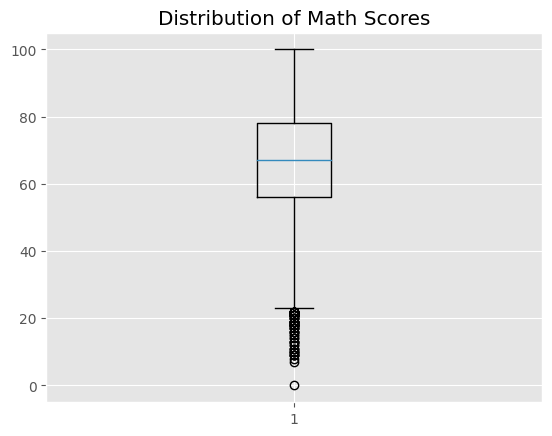

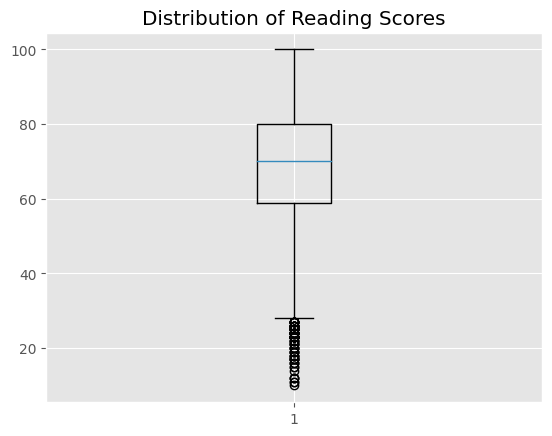

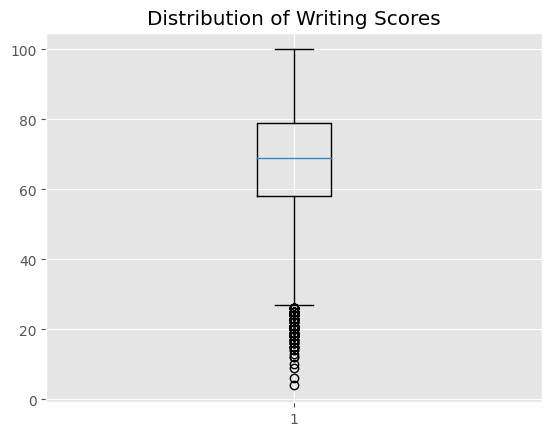

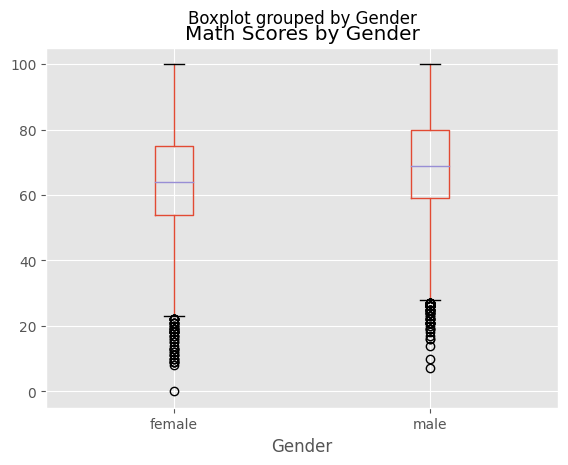

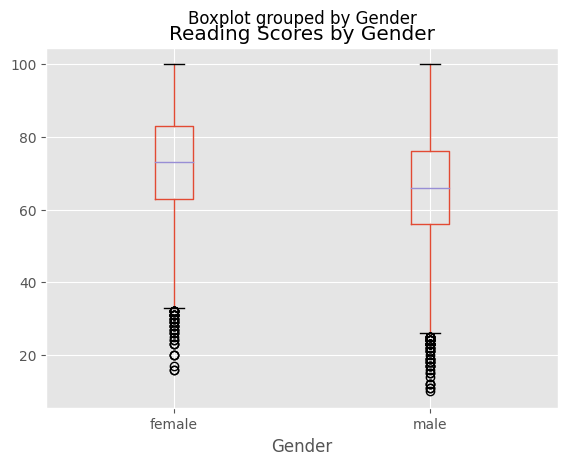

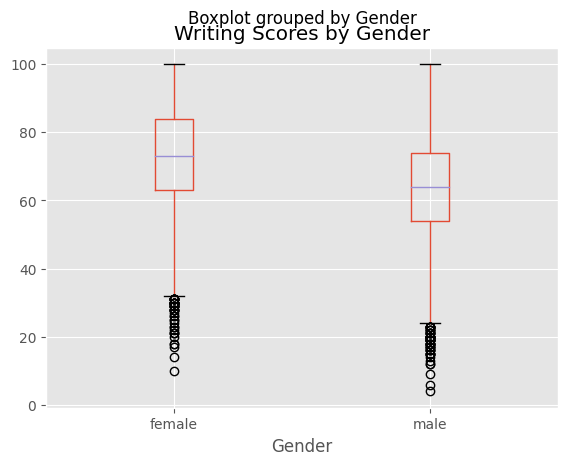

In [54]:
# create a boxplot for math score
plt.boxplot(df['MathScore'])
plt.title('Distribution of Math Scores')
plt.show()

# create a boxplot for reading score
plt.boxplot(df['ReadingScore'])
plt.title('Distribution of Reading Scores')
plt.show()

# create a boxplot for writing score
plt.boxplot(df['WritingScore'])
plt.title('Distribution of Writing Scores')
plt.show()

# create box plots for math score by gender
df.boxplot(column='MathScore', by='Gender')
plt.title('Math Scores by Gender')
plt.show()

# create box plots for reading score by gender
df.boxplot(column='ReadingScore', by='Gender')
plt.title('Reading Scores by Gender')
plt.show()

# create box plots for writing score by gender
df.boxplot(column='WritingScore', by='Gender')
plt.title('Writing Scores by Gender')
plt.show()

